FILTERING

In [29]:
import pandas as pd 
df =pd.read_csv(r"C:\Users\kajal\Desktop\Epoch_learningBoard\clustering_data.csv", dtype={'CircleName':'str','RegionName':'str','DivisionName':'str','OfficeName':'str','Pincode':'str','OfficeType':'str','Delivery':'str','District':'str','StateName':'str','Latitude':'str','Longitude':'str'})

In [30]:
df.shape

(157126, 11)

In [31]:
df

,CircleName,RegionName,DivisionName,OfficeName,Pincode,OfficeType,Delivery,District,StateName,Latitude,Longitude
0,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Peddakotla B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5689,77.85624
1,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Pinnadhari B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.5281,77.857014
2,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Yerraguntapalle B.O,515631,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.561111,77.85715
3,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Obulareddipalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.2488,78.2588
4,Andhra Pradesh Circle,Kurnool Region,Hindupur Division,Odulapalli B.O,515581,BO,Delivery,ANANTAPUR,ANDHRA PRADESH,14.24555,78.2477
...,...,...,...,...,...,...,...,...,...,...,...
157121,Uttar Pradesh Circle,Bareilly Region,Meerut Division,Rly Road Meerut SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.98,77.68
157122,Uttar Pradesh Circle,Bareilly Region,Meerut Division,SGMandi SO,250002,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.9724,77.67536
157123,Uttar Pradesh Circle,Bareilly Region,Meerut Division,W K Road SO,250001,PO,Non Delivery,MEERUT,UTTAR PRADESH,28.99,77.71
157124,Kerala Circle,Calicut Region,Calicut Division,Kakkoti SO,673611,PO,Delivery,KOZHIKODE,KERALA,11.24529,75.778455


In [32]:
filt=(df['StateName']=='TAMIL NADU')


In [33]:
new_df=df.loc[filt,['StateName','Pincode','Latitude','Longitude']]

In [34]:
new_df

,StateName,Pincode,Latitude,Longitude
1733,TAMIL NADU,639103,10.84527778,78.59638889
5428,TAMIL NADU,605403,12.067166,79.395827
5900,TAMIL NADU,636705,12.0933,78.202
15612,TAMIL NADU,600100,12.905914,80.201454
52941,TAMIL NADU,627152,8.570259,77.621218
...,...,...,...,...
156933,TAMIL NADU,614723,10.282417,79.315694
156934,TAMIL NADU,614602,10.4179722,79.3204444
156972,TAMIL NADU,614625,10.6295833,79.2537778
156973,TAMIL NADU,614626,10.5493611,79.2875556


In [35]:
new_df.dropna(inplace=True)

In [36]:
new_df

,StateName,Pincode,Latitude,Longitude
1733,TAMIL NADU,639103,10.84527778,78.59638889
5428,TAMIL NADU,605403,12.067166,79.395827
5900,TAMIL NADU,636705,12.0933,78.202
15612,TAMIL NADU,600100,12.905914,80.201454
52941,TAMIL NADU,627152,8.570259,77.621218
...,...,...,...,...
156933,TAMIL NADU,614723,10.282417,79.315694
156934,TAMIL NADU,614602,10.4179722,79.3204444
156972,TAMIL NADU,614625,10.6295833,79.2537778
156973,TAMIL NADU,614626,10.5493611,79.2875556


In [37]:
new_df.drop_duplicates(subset=['Latitude','Longitude'],inplace=True)

In [39]:
new_df #Here we have gathered the unique pairs of latitude and longitude,but the pincodes are not unique

,StateName,Pincode,Latitude,Longitude
1733,TAMIL NADU,639103,10.84527778,78.59638889
5428,TAMIL NADU,605403,12.067166,79.395827
5900,TAMIL NADU,636705,12.0933,78.202
15612,TAMIL NADU,600100,12.905914,80.201454
52941,TAMIL NADU,627152,8.570259,77.621218
...,...,...,...,...
156933,TAMIL NADU,614723,10.282417,79.315694
156934,TAMIL NADU,614602,10.4179722,79.3204444
156972,TAMIL NADU,614625,10.6295833,79.2537778
156973,TAMIL NADU,614626,10.5493611,79.2875556


Creating a map with req co ordinates 

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from descartes import PolygonPatch
#we have new_df
geometry=[Point(xy) for xy in zip(new_df.Longitude, new_df.Latitude)]
new_df['geometry']=geometry

gdf=gpd.GeoDataFrame(new_df, crs='EPSG:4326')
states_gdf=gpd.read_file(r"C:\Users\kajal\Desktop\Epoch_learningBoard\india_ds.shp")

fig,ax= plt.subplots(figsize=(10,6))

states_patch= PolygonPatch(states_gdf.iloc[0][geometry], alpha=0.7, color='lightgray')
ax.add_patch(states_patch)

gdf.plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [48]:
new_df['Latitude'].astype(float)

1733      10.845278
5428      12.067166
5900      12.093300
15612     12.905914
52941      8.570259
            ...    
156933    10.282417
156934    10.417972
156972    10.629583
156973    10.549361
156993    11.242756
Name: Latitude, Length: 10166, dtype: float64

In [49]:
new_df['Longitude'].astype(float)

1733      78.596389
5428      79.395827
5900      78.202000
15612     80.201454
52941     77.621218
            ...    
156933    79.315694
156934    79.320444
156972    79.253778
156973    79.287556
156993    76.960891
Name: Longitude, Length: 10166, dtype: float64

Now we need to scale our data

In [93]:
ult_df=new_df.loc[:,['Latitude','Longitude']]

In [102]:
ult_df['Latitude'].astype(float)

1733      10.845278
5428      12.067166
5900      12.093300
15612     12.905914
52941      8.570259
            ...    
156933    10.282417
156934    10.417972
156972    10.629583
156973    10.549361
156993    11.242756
Name: Latitude, Length: 10166, dtype: float64

In [103]:
ult_df['Longitude'].astype(float)

1733      78.596389
5428      79.395827
5900      78.202000
15612     80.201454
52941     77.621218
            ...    
156933    79.315694
156934    79.320444
156972    79.253778
156973    79.287556
156993    76.960891
Name: Longitude, Length: 10166, dtype: float64

In [110]:
import numpy as np
new_array= np.array(ult_df[['Latitude','Longitude']])
neu_array= new_array.astype(float)

In [114]:
neu_array= ((neu_array -neu_array.min())/(neu_array.max() - neu_array.min()))*9 +1

In [115]:
neu_array.dtype

dtype('float64')

K means clustering 
K-refers to number of clusters,it can be any number,depends on strategies

1)Randomly allot the centroid of the number of clusters you want

2)Now compute the distance of each data point to the centroid,and classify that point to the centroid nearest to it,do this for all data points

3)Now reposition the centroid of each class acc to the newly formed classified data

4)Now again repeat step 2 for all the data points(This is one iteartion)

5)Now do step 3 again

6)Keep doing this until you reach the max iteration or until the centroids dont seem to move at all



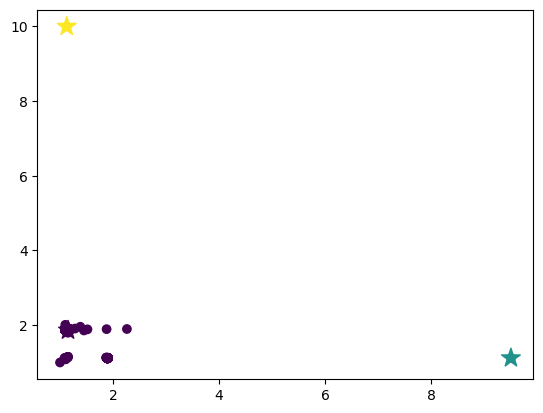

In [123]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansClustering:
    def __init__(self,k):
        self.k=k
        self.centroids=None


    @staticmethod #This is used bcoz for finding the distance we are not going to modify the datapoints or the centroids
    def euclidean_distance(data_points,centroids):
        return np.sqrt(np.sum((data_points-centroids)**2,axis=1)) #axis is 1 here cuz we are summing across the rows

        
    def fit(self,X,max_iterations=200):
        # We need to make sure that the centroids we randomly allot lie in between the range of the two axis(i.e X and Y)
        # Here axis=0 means we are finding the maximum and minimum values across the columns,whereas axis=1 we are finding the max and min values across rows
        self.centroids=np.random.uniform(np.amin(X,axis=0),np.amax(X,axis=0),size=(self.k, X.shape[1]))
        #size refers to the number of random allotments we need,and the no of columns of X array
        #uniform refers to treating each of the data points with equal probability

        for _ in range(max_iterations):
            y=[] #This is an empty list for now,which will hold the cluster labels for the data points in X

            for data_points in X: #Iterating through the datapoint in the array
                distances=KMeansClustering.euclidean_distance(data_points,self.centroids)
                cluster_num=np.argmin(distances) 
                #The argmin() function returns the index of the smallest element in array "distances"

                y.append(cluster_num)

            y=np.array(y)

            cluster_indices=[]

            for i in range(self.k): # we find which all indices belong to a particular cluster
                cluster_indices.append(np.argwhere(y==i)) # it grabs the indices where y is equal to the cluster number 


            # now cluster_indices is a list that contains a lists of indices belonging to different clusters

            # now its time to recompute the cluster centres
            cluster_centers=[]

            for i,indices in enumerate(cluster_indices):
                if len(indices)==0:
                    cluster_centers.append(self.centroids[i])

                else:
                    cluster_centers.append(np.mean(X[indices],axis=0)[0])

            if np.max(self.centroids-np.array(cluster_centers)) <0.0001:
                break
            else:
                 self.centroids= np.array(cluster_centers)
        return y


random_points=neu_array

kmeans=KMeansClustering(k=3)
labels=kmeans.fit(random_points)

            
# plotting the output
plt.scatter(random_points[:,0], random_points[:,1], c=labels)
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:, 1], c= range(len(kmeans.centroids)), marker="*", s=200)

plt.show()